# Objetivo do projeto

O objetivo do projeto é fazer um modelo de aprendizado de máquina que detecte fraudes em transações de cartão de crédito. 

Esse é um projeto para a disciplina ICP 363 Aprendizado de máquina dos alunos Gustavo Henrique Lemos de Lima e Yuri Vital Chalfun

# Análise Inicial

### Importando as bibliotecas necessárias para a análise

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

### Agora, importando o dataframe a ser utilizado para o treinamento

In [2]:
df = pd.read_csv("dataset/card_transdata.csv")

### Vamos ver algumas coisas sobre o Dataframe

In [3]:
formato = df.shape
tamanho = df.size


print("O dataframe possui",formato[0],"linhas e",formato[1],'colunas')
print("Tamanho do dataframe:",tamanho)


O dataframe possui 1000000 linhas e 8 colunas
Tamanho do dataframe: 8000000


Podemos ver que ele tem 1000000 (1 milhão) de instâncias e colunas.

Durante a escolha desse dataframe vi a discussão de que ele possívelmente é simulado, mas acredito que o treinamento possa ser feito ainda sim.

### Vamos ver agora, quais colunas ele possui e algumas informações sobre ela

In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


De fato ele possui 1 milhão de instâncias, seguinto o dícionário disponibilizado no slide da Aula 2 do professor:

count: Número de elementos

mean: Média

std: Desvio Padrão

min: Menor valor

25%: Primeiro quartil

50%: Mediana

75%: Terceiro quartil

max: Maior valor

Podemos ver que é um dataset de dados estruturados, o que facilitará a análise

### Descrição sobre os valores das colunas

Como no Kaggle, lugar de onde se originou esse dataset, há a descrição das colunas, vou colocar aqui a tradução livre:

*Distance_from_home*: A distância entre o lugar da compra e a casa do comprador (Unidades de medidas desconhecidas)

*Distance_from_last_transaction*: A distância entre o lugar da compra e o lugar de compra anterior (Unidades de medidas desconhecidas, provavelmente a mesma da anterior)

*Ratio_to_median_purchase_price*: Razão entre o preço da transação e a média dos valores das compras do comprador (Provavelmente, unidades absolutas $/$)

*Repeat_retailer*: Se a compra aconteceu com o mesmo vendedor (0 em caso negativo ou 1 em caso positivo)

*Used_chip*: Se a transação aconteceu usando chip(cartão de crédito) (0 em caso negativo ou 1 em caso positivo)

*Use_pin_number*: Se a transação ocorreu usando senha (0 em caso negativo ou 1 em caso positivo)

*Online_order*: Se a transação foi uma transação online (0 em caso negativo ou 1 em caso positivo)

*fraud*: Se a transação foi uma fraude (0 em caso negativo ou 1 em caso positivo / 0 não foi fraude, 1 foi fraude)

### Como a média de operações fraudulentas é 0.087403 , devemos esperar 87403 operações fraudulentas, vamos ver se isso é verdade

In [5]:
count = df['fraud'].value_counts()
print(count)

0.0    912597
1.0     87403
Name: fraud, dtype: int64


De fato, isso se confirmou

### Um pouco da análise da distância das transações

In [6]:
count = df['distance_from_home'].value_counts()
print(count)

57.877857     1
17.696734     1
47.933214     1
48.300681     1
25.414372     1
             ..
145.704144    1
4.501861      1
17.443799     1
3.583736      1
58.108125     1
Name: distance_from_home, Length: 1000000, dtype: int64


Parecem ter muitas distâncias separadas, vamos ver

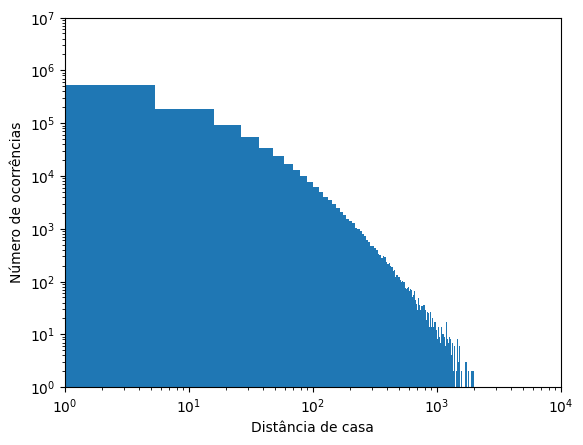

In [7]:
plt.hist(df['distance_from_home'],align='left',bins = 1000)
plt.yscale('log')
plt.ylim(1,1e7)
plt.xscale('log')
plt.xlim(1,10000)
plt.xlabel('Distância de casa')
plt.ylabel('Número de ocorrências')
plt.show()

A grande maioria parece ter sido perto de casa

# Pré processamento

Como visto na análise inicial da base, vemos que a base é uma base de qualidade, o único problema foi a discussão de se os dados teriam credibilidade pois, por ser uma base de dados de cartão de crédito, a confidenciabilidade é imprescindível, logo, não há muitas informações de onde os dados foram originados.

Houve também, uma discussão se a base teria sido fabricada, mas sem a participação do dono da base, ele disse em outros comentários que não tem muitas informações de onde a base saiu.

Outras bases de cartão de crédito tem suas colunas criptografadas, o que dificulta bastante a legibilidade

Os dados são fáceis de serem interpretados, pois as colunas vieram com descrição

Para mim, a presença de outliers é importante para a finalidade do prejeto, pois pode significar a presença de uma transação fraudulenta

Os outliers que forem valores negativos, precisariam ser tirados, mas de acordo com a análise inicial, os valores da razão entre compra e média de compra é sempre positivo pois o valor mínimo foi positivo. Portanto naõ houveram compras "negativas".

### Vamos ver os tipos de dados do dataframe

In [8]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

São todos dados numéricos, do tipo float, portanto, não há dados não estruturados em que será necessário extrair algum tipo de informação

### Medidas de posição

Vamos ver algumas medidas de posiçãoe e dispersão, novamente, para ver como se comportam os dados

In [9]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos ver que a média dos atributos que são binários nos dizem, tambeḿ, a moda, se a média for menor que 0,5, temos moda 0, caso fosse maior que 0,5 teriamos moda 1, caso fosse igual a 0,5, teriamos exatamente metade dos dados com valor 1 e a outra metade com valor 0, vamos confirmar isso

In [10]:
print('Moda online_order: ',stats.mode(df['online_order']))
print('Moda repeat_retailer: ',stats.mode(df['repeat_retailer']))
print('Moda used_chip',stats.mode(df['used_chip']))
print('Moda used_pin_number',stats.mode(df['used_pin_number']))
print('Moda fraud',stats.mode(df['fraud']))

Moda online_order:  ModeResult(mode=1.0, count=650552)
Moda repeat_retailer:  ModeResult(mode=1.0, count=881536)
Moda used_chip ModeResult(mode=0.0, count=649601)
Moda used_pin_number ModeResult(mode=0.0, count=899392)
Moda fraud ModeResult(mode=0.0, count=912597)


Para os atributos não binários, temos alguns outros valores para a moda

In [11]:
print("moda distance_from_home",stats.mode(df['distance_from_home']))
print('moda distance_from_last_transaction',stats.mode(df['distance_from_last_transaction']))
print("moda ratio_to_median_purchase_price",stats.mode(df['ratio_to_median_purchase_price']))

moda distance_from_home ModeResult(mode=0.0048743850667442, count=1)
moda distance_from_last_transaction ModeResult(mode=0.000118281615244, count=1)
moda ratio_to_median_purchase_price ModeResult(mode=0.004399239615964, count=1)


Como são valores de float, não é surpresa esse resultado, mas podemos usar a mediana pra ter uma boa noção desse valor pois são dados assimétricos, visto a distância da mediana e dos valores máximos, ela pode ser vista no campo '50%' da descrição do dataset

### Medidas de Dispersão

Fazer algumas medidas de dispersões (Os quartis)

Dar uma breve explicação

Fazer boxplot


Vamos analisando os quartis, novamente usando o método describe

In [12]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Como as colunas de valores binários só assumem 2 valores, não temos uma noção de "meio" da distribuição oferecida pela média e pela mediana, então nesses casos o quartil não é tão efetivo, mas para as colunas que assumem mais valores, podemos notar distribuições interessantes.

Vamos ver como se comporta a distribuição desses valores

In [13]:
def grafico(nome): # Aplicar a distribuição do gráfico
    plt.hist(df[nome],align='left',bins = 1000)
    serie = df[nome].describe()
    max_value =serie[7] #Valor máximo para colocar os limites
    min_value = serie[3] #Valor máximo para também colocar no limite
    #Quartis
    q1=serie[4]#Primeiro
    q2=serie[5]#Segundo
    q3=serie[6]#terceiro
    #Escala log, valores máximos, e label
    plt.yscale('log')
    plt.ylim(1,1.5e6)
    plt.xscale('log')
    plt.xlim(min_value,max_value)
    plt.xlabel(nome)
    plt.ylabel('Número de ocorrências')
    plt.title(nome+' x Número de ocorrências')
    
    #Adicionando os quartis

    plt.axvline(x=q1,color = 'g',label = "primeiro quartil")
    plt.axvline(x=q2,color = 'r',label = "segundo quartil")
    plt.axvline(x=q3,color = 'y',label = "terceiro quartil")
    plt.show()

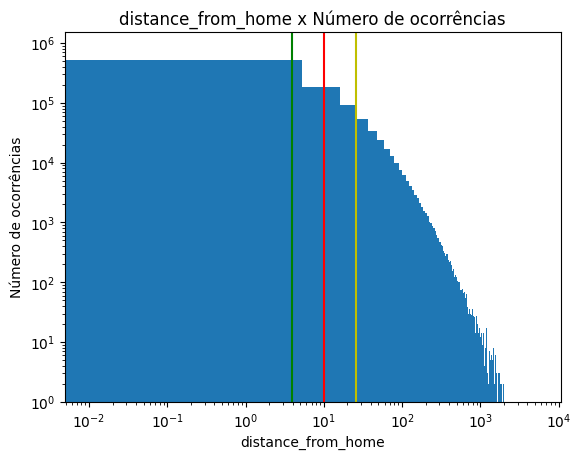

In [14]:
grafico('distance_from_home')

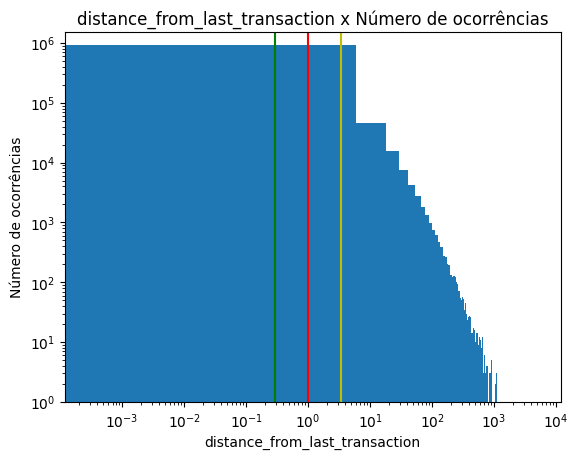

In [15]:
grafico('distance_from_last_transaction')

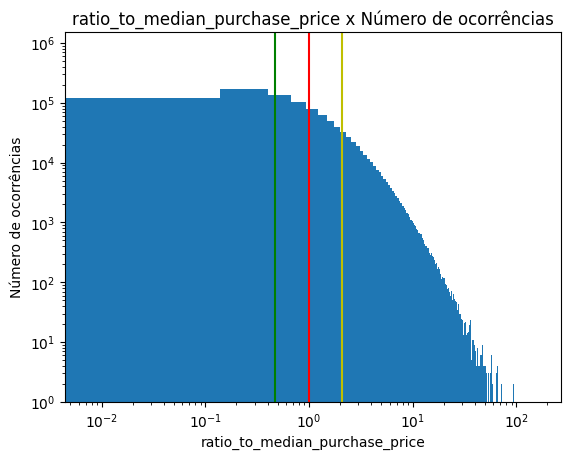

In [16]:
grafico('ratio_to_median_purchase_price')

Para esclarecer: 

Da linha verde à linha x = 0 é o primeiro quartil

Entre a linha verde e vermelha, segundo quartil

Entre a linha vermelha e amarela, terceiro quartil

Entre a linha amarela e fim do gráfico, quarto quartil

Podemos ver como a maioria dos dados está distribuida em torno de certos valores.

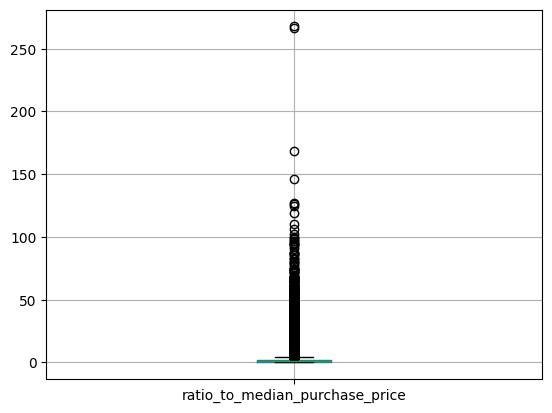

In [20]:
boxplot=df.boxplot(column = ['ratio_to_median_purchase_price'])

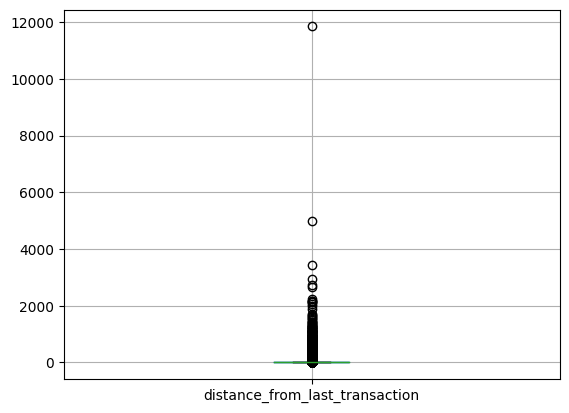

In [21]:
boxplot=df.boxplot(column=['distance_from_last_transaction'])

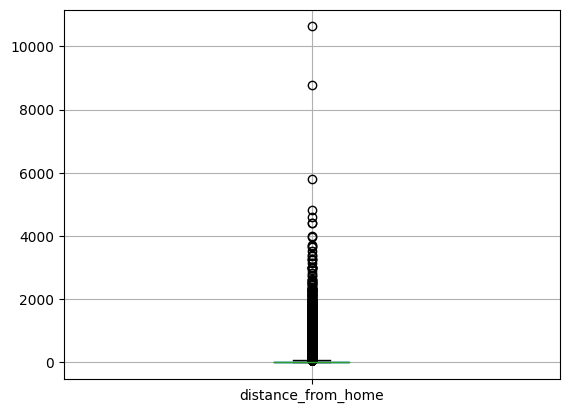

In [22]:
boxplot=df.boxplot(column=['distance_from_home'])

Podemos ver que os boxplots estão bem ruins de ver, isso se deve a presença de outliers que se afastam muito da maioria dos dados por ordens de magnetude, portanto, a vizualização desse gráfico ficará melhor após a limpeza dos dados.

## Limpeza de dados

Fazer remoção de Outlier só pra mostrar que sabemos fazer, mas podemos explicar que outliers são importantes

Valores ausentes?
Conseguimos preencher eles?
tirar instancias duplicadas

## Seleção de atributos

Reduzir o número de variáveis de entrada...
Coisas do slide

### Transformação dos dados

Aquelas dos slides

# Acho que fim da parte 1